In [1]:
##loading the data set
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
MORE_TRAIN_CSV_FILE = "more_train.csv"
MORE_TEST_CSV_FILE = "more_test.csv"



In [3]:
# If true, the WAV files will be read and their features will be saved in the CSV files
# As this is the most time consuming task, only enable it if you don't have the CSV files yet
CREATE_CSV_FILES = True

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("../data/recordings/train", TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/test", TEST_CSV_FILE)
    extractWavFeatures("../data/recordings/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/moreSpeakersTest", MORE_TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder ../data/recordings/train will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder ../data/recordings/test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder ../data/recordings/moreSpeakersTrain will be saved to more_train.csv
CSV Hea

In [6]:
#Reading a dataset and convert file name to corresbonding umnber

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    # we have six speakers: 
    # 0: Jackson
    # 1: Nicolas 
    # 2: Theo
    # 3: Ankur
    # 4: Caroline
    # 5: Rodolfo
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        #print(speaker)
        if speaker == "j":
            speaker = "0"
        elif speaker == "n":
            speaker = "1"
        elif speaker == "t":
            speaker = "2"
        elif speaker == "a":
            speaker = "3"
        elif speaker == "c":
            speaker = "4"
        elif speaker == "r":
            speaker = "5"
        else: 
            speaker = "6"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
moreTestData = preProcessData(MORE_TEST_CSV_FILE)



train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.056216        1032.217877          913.675692  1901.381836   
1  0.047560         957.186513          985.567759  1946.270282   
2  0.077792         715.153782          829.027413  1364.168294   
3  0.004177        1049.574804         1001.825375  2241.247559   
4  0.048911        1031.357816          913.597711  1952.941895   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.058105 -325.864807  231.115234 -74.036324  12.005396   
1            0.049241 -345.559723  231.203629 -59.573689  21.147900   
2            0.035048 -357.849945  203.802567  -5.626777  29.251755   
3            0.043647 -584.713562  214.255554 -70.903893  32.681511   
4            0.065945 -344.270386  234.691711 -77.355721  12.481426   

       mfcc5  ...     mfcc12     mfcc13    mfcc14     mfcc15     mfcc16  \
0  13.277349  ... -17.249941  12.34711

In [7]:
trainData["number"] = trainData["number"].astype(str).astype(int)
testData["number"] = testData["number"].astype(str).astype(int)
moreTrainData["number"] = moreTrainData["number"].astype(str).astype(int)
moreTestData["number"] = moreTestData["number"].astype(str).astype(int)

In [8]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

Y from training data: (1029,)
Y from validation data: (441,)
Y from test data: (30,)


In [9]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

X from training data (1029, 25)
X from validation data (441, 25)
X from test data (30, 25)


In [10]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 0s 31ms/step - loss: 2.1916 - accuracy: 0.2449 - val_loss: 1.5375 - val_accuracy: 0.8503
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 1.4509 - accuracy: 0.5841 - val_loss: 0.8504 - val_accuracy: 0.9206
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.9897 - accuracy: 0.6832 - val_loss: 0.4288 - val_accuracy: 0.9274
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6390 - accuracy: 0.7872 - val_loss: 0.1986 - val_accuracy: 0.9683
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.4676 - accuracy: 0.8513 - val_loss: 0.1127 - val_accuracy: 0.9751
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3176 - accuracy: 0.8931 - val_loss: 0.0870 - val_accuracy: 0.9796
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2312 - accuracy: 0.9378 - val_loss: 0.0739 - val_accuracy: 0.9819
Epoch 8/50
9/9 [===============

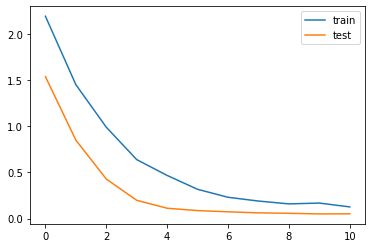

In [11]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [12]:
def getSpeaker(speaker):
    speaker = str(speaker)
    if speaker == "0":
        return "Jackson"
    elif speaker == "1":
        return "Nicola"
    elif speaker == "2":
        return "Theo"
    elif speaker == "3":
        return "Ankur"
    elif speaker == "4":
        return "Caroline"
    elif speaker == "5":
        return "Rodolfo"
    else: 
        speaker = "Unknown"
        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        prediction = getSpeaker(model.predict_classes(X_data[i:i+1])[0])
        speaker = getSpeaker(y_data[i])
        if printDigit == True:
            print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, speaker, prediction, speaker==prediction))
        else:
            print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

In [13]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = model.predict_classes(X_data)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    target_names = ["Jackson", "Nicola", "Theo", "Ankur", "Caroline", "Rodolfo", "Unknown"]
    print(classification_report(y_test_num, Y_pred))



In [14]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)


# TEST DATA #

1/1 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 1.0000
accuracy: 100.00%

# Generate predictions
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True


Classification Report for Test Data

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


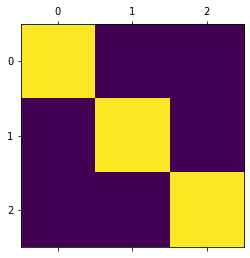


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

In [16]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split

fullTrainData = trainData.append(moreTrainData)

X = np.array(fullTrainData.iloc[:, :-1], dtype = float)
y = fullTrainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

X_more_test = np.array(moreTestData.iloc[:, :-1], dtype = float)
y_more_test = moreTestData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)
print("Y from other speakers test data:", y_more_test.shape)

Y from training data: (1050,)
Y from validation data: (450,)
Y from test data: (30,)
Y from other speakers test data: (30,)


In [17]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_more_test = scaler.transform( X_more_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)
print("X from other speakers test data", X_more_test.shape)



X from training data (1050, 25)
X from validation data (450, 25)
X from test data (30, 25)
X from other speakers test data (30, 25)


In [18]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray( y_train).astype(np.float32)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50
9/9 [==============================] - 0s 16ms/step - loss: 2.0465 - accuracy: 0.2743 - val_loss: 1.5115 - val_accuracy: 0.7844
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 1.3890 - accuracy: 0.5829 - val_loss: 0.8863 - val_accuracy: 0.8822
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.9502 - accuracy: 0.7181 - val_loss: 0.5068 - val_accuracy: 0.9311
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6415 - accuracy: 0.8210 - val_loss: 0.3436 - val_accuracy: 0.9533
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4799 - accuracy: 0.8562 - val_loss: 0.2634 - val_accuracy: 0.9578
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3321 - accuracy: 0.9219 - val_loss: 0.2286 - val_accuracy: 0.9578
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.2938 - accuracy: 0.9276 - val_loss: 0.1959 - val_accuracy: 0.9622
Epoch 8/50
9/9 [==============

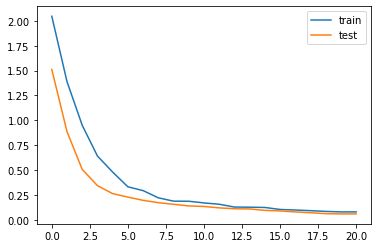

In [19]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [20]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)


# TEST DATA #

1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
accuracy: 100.00%

# Generate predictions
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True
y=Nicola    - prediction=Nicola    - match=True
y=Theo      - prediction=Theo      - match=True


In [21]:
print('\n# OTHER SPEAKERS DATA #\n')
score = model.evaluate(X_more_test, y_more_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_more_test[0:10], y_more_test[0:10], False)


# OTHER SPEAKERS DATA #

1/1 [==============================] - 0s 877us/step - loss: 1.7691 - accuracy: 0.4667
accuracy: 46.67%

# Generate predictions
y=Rodolfo   - prediction=Nicola    - match=False
y=Caroline  - prediction=Jackson   - match=False
y=Ankur     - prediction=Ankur     - match=True
y=Ankur     - prediction=Ankur     - match=True
y=Rodolfo   - prediction=Rodolfo   - match=True
y=Rodolfo   - prediction=Jackson   - match=False
y=Caroline  - prediction=Caroline  - match=True
y=Ankur     - prediction=Ankur     - match=True
y=Ankur     - prediction=Ankur     - match=True
y=Caroline  - prediction=Ankur     - match=False


Classification Report for Test Data

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


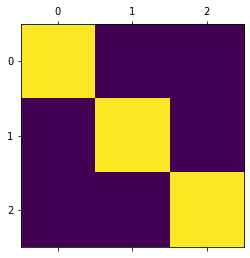


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for Other Speakers

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0 10  0  0]
 [ 5  0  3  2  0]
 [ 4  1  3  0  2]]


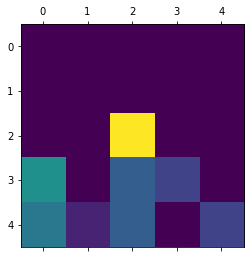


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       0.62      1.00      0.77        10
           4       1.00      0.20      0.33        10
           5       1.00      0.20      0.33        10

    accuracy                           0.47        30
   macro avg       0.53      0.28      0.29        30
weighted avg       0.88      0.47      0.48        30



/Users/nbhadra/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

print("Classification Report for Other Speakers\n")
report(X_more_test, y_more_test)